<a href="https://colab.research.google.com/github/katerinakazantseva/SnakeMakeAdv/blob/master/CNV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy
import pandas

#stream = os.popen('samtools dept toy.sam -a > output.txt')
#stream2=os.popen('samtools depth toy2.sam -a > output2.txt')

pd=pandas.read_table('output.txt',header=None)
pd2=pandas.read_table('output2.txt',header=None)

pd.columns =['ch', 'start', 'd1']
pd2.columns =['ch', 'start', 'd2']


df=pd.merge(pd2, how='outer')   
df['d1'] = df['d1'].fillna(0)
df['d2'] = df['d2'].fillna(0)
df=df.replace(0,0.1)
#df['test']=numpy.divide(df['d2'],df['d1'])
df['logfc']=numpy.log2(numpy.divide(df['d2'],df['d1']))
df.to_csv('res.csv')
print(df)                                                                   

      ch  start   d1   d2     logfc
0    ref      1  0.1  0.1  0.000000
1    ref      2  0.1  0.1  0.000000
2    ref      3  0.1  0.1  0.000000
3    ref      4  0.1  0.1  0.000000
4    ref      5  0.1  0.1  0.000000
..   ...    ...  ...  ...       ...
80  ref2     36  0.1  1.0  3.321928
81  ref2     37  0.1  0.1  0.000000
82  ref2     38  0.1  0.1  0.000000
83  ref2     39  0.1  0.1  0.000000
84  ref2     40  0.1  2.0  4.321928

[85 rows x 5 columns]


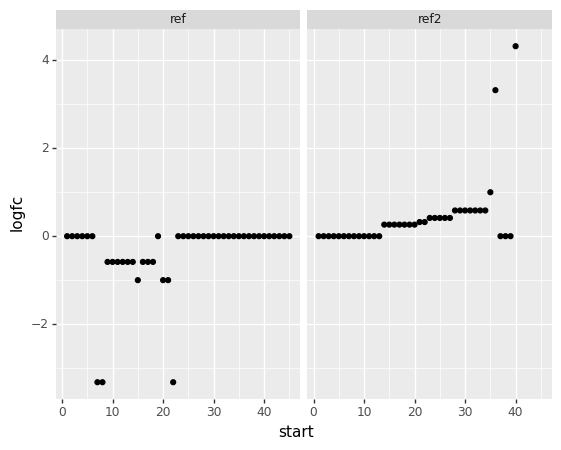

<ggplot: (8738532137877)>

In [ ]:
ggplot(df)+aes(x="start", y="logfc")+geom_point()+facet_wrap(["ch"])